Importing Necessary Libraries: 

In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Data Processing:

In [39]:
#Loading the data from sklearn
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [40]:
#Print the first 5 rows of the dataframe
print(data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [41]:
#Adding the target column to the dataframe
data['target'] = diabetes.target

In [42]:
#Print the last 5 rows of dataframe
print(data.tail())

          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  


In [43]:
#Number of rows and columns in the dataset
print(data.shape)

(442, 11)


In [44]:
#Getting some information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [45]:
#Statistical measures about the data
print(data.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

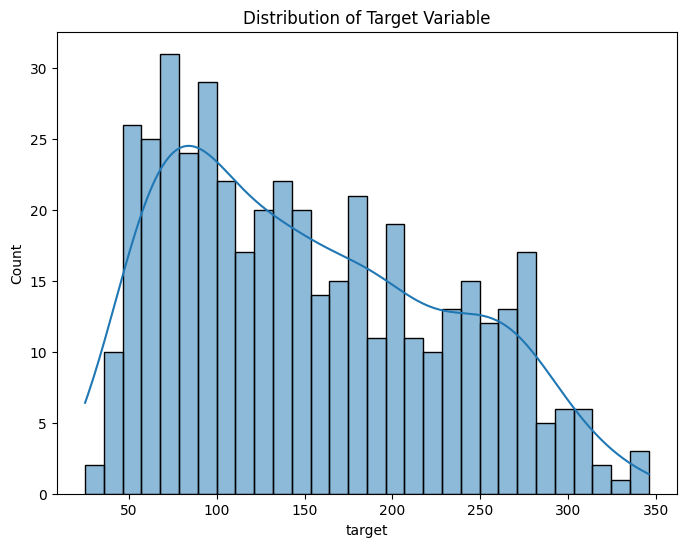

In [46]:
#Checking the distribution of target variables
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

1 represents Benign and 0 represents Malignant:

In [47]:
# Assuming we need a binary classification, we can threshold the target
data['target'] = (data['target'] > data['target'].median()).astype(int)

Separating the features and target:

In [48]:
X = data.drop(columns=['target'])
y = data['target']

Normalizing data: 

In [49]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Correlation Matrix: 

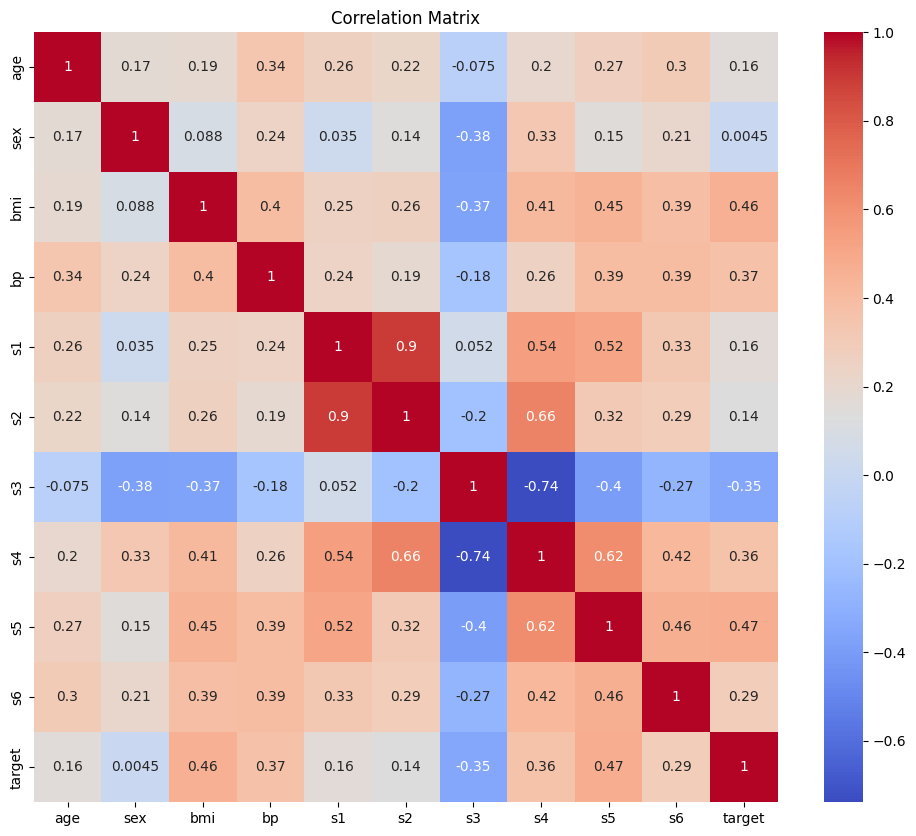

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Box Plot: 

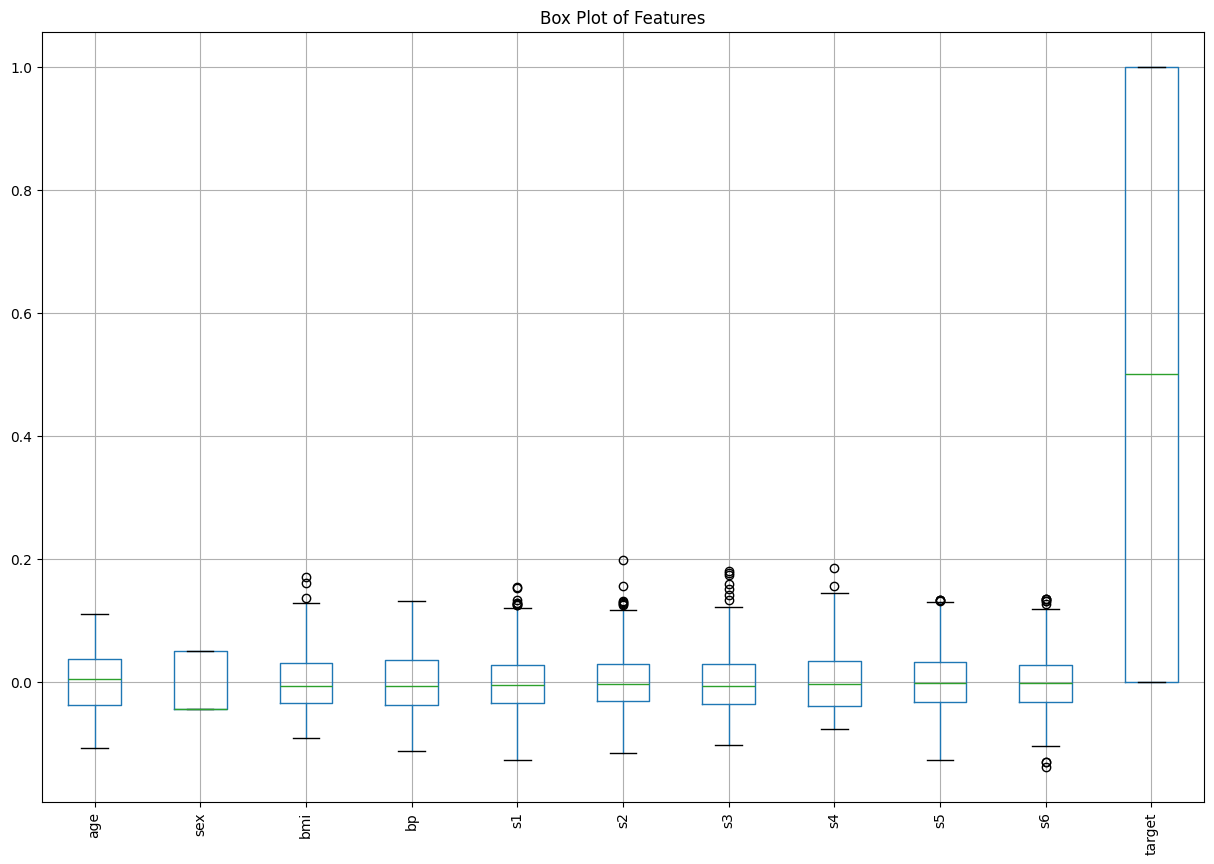

In [51]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

In [52]:
# Loading the data from sklearn
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Binarizing the target for classification (optional)
data['target'] = (data['target'] > data['target'].median()).astype(int)

# Separating the features and target
X = data.drop(columns=['target'])
y = data['target']

# Normalizing data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

Train and Evaluate Models:

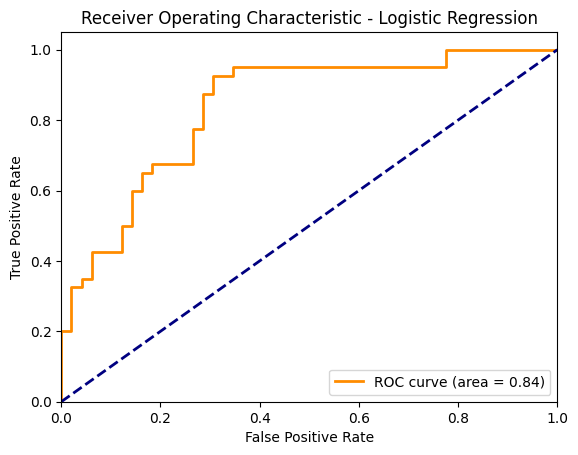

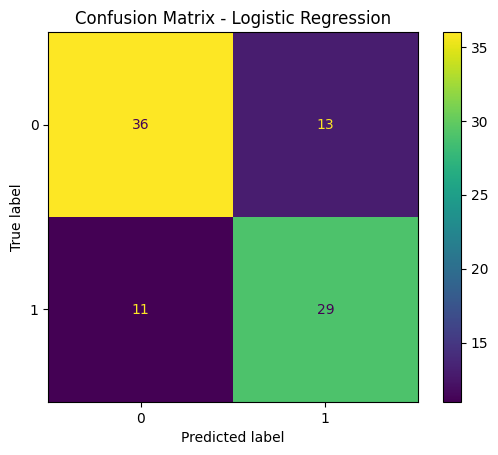

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, auc, roc_curve


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Decision class

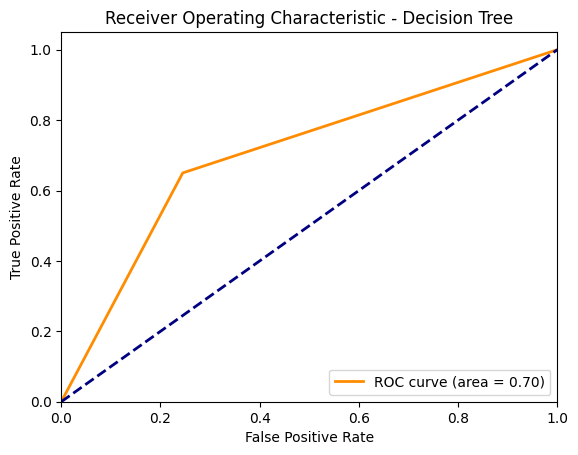

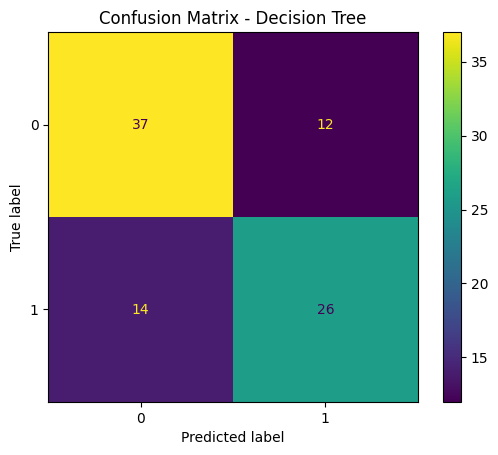

In [54]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dtree)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dtree)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Support Vector Machine (SVM):

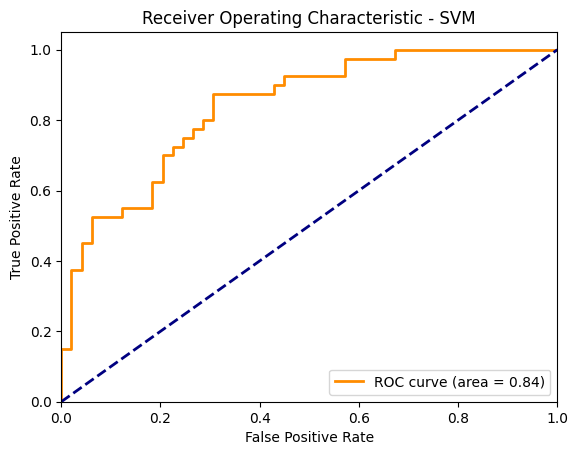

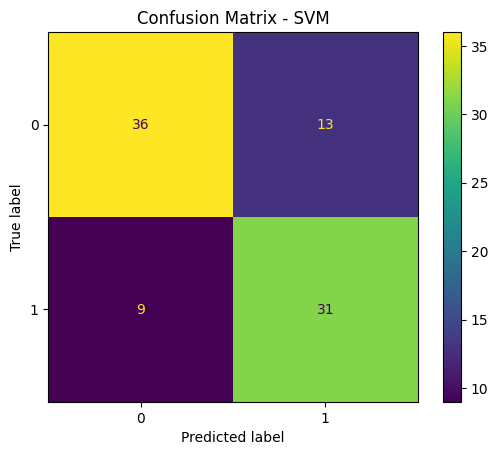

In [55]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix - SVM')
plt.show()

Training and Evaluation:

In [56]:
#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [57]:
#Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [58]:
#Evaluating Logistic Regression Model
y_pred_logreg = logreg.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Precision: {precision_score(y_test, y_pred_logreg)}')
print(f'Recall: {recall_score(y_test, y_pred_logreg)}')
print(f'F1 Score: {f1_score(y_test, y_pred_logreg)}')
print(confusion_matrix(y_test, y_pred_logreg))

Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall: 0.725
F1 Score: 0.7073170731707317
[[36 13]
 [11 29]]


In [59]:
#Train Decision Tree Model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
#Evaluating Decision Tree Model
y_pred_dtree = dtree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_dtree)}')
print(f'Precision: {precision_score(y_test, y_pred_dtree)}')
print(f'Recall: {recall_score(y_test, y_pred_dtree)}')
print(f'F1 Score: {f1_score(y_test, y_pred_dtree)}')
print(confusion_matrix(y_test, y_pred_dtree))

Accuracy: 0.7078651685393258
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666666
[[37 12]
 [14 26]]


In [61]:
#Train Support Vector Machine (SVM) Model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [62]:
#Evaluate SVM
y_pred_svm = svm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision: {precision_score(y_test, y_pred_svm)}')
print(f'Recall: {recall_score(y_test, y_pred_svm)}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm)}')
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.7528089887640449
Precision: 0.7045454545454546
Recall: 0.775
F1 Score: 0.7380952380952381
[[36 13]
 [ 9 31]]


Other Algorithm Considered:

In [63]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Recall: {recall_score(y_test, y_pred_rf)}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7191011235955056
Precision: 0.6744186046511628
Recall: 0.725
F1 Score: 0.6987951807228916
[[35 14]
 [11 29]]


In [64]:
#K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_knn)}')
print(f'Recall: {recall_score(y_test, y_pred_knn)}')
print(f'F1 Score: {f1_score(y_test, y_pred_knn)}')
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.6853932584269663
Precision: 0.65
Recall: 0.65
F1 Score: 0.65
[[35 14]
 [14 26]]


Comparative Analysis of Models:

In [65]:
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'SVM': svm,
    'Random Forest': rf,
    'KNN': knn
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'=== {name} ===')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

=== Logistic Regression ===
Accuracy: 0.7303370786516854
Precision: 0.6904761904761905
Recall: 0.725
F1 Score: 0.7073170731707317
[[36 13]
 [11 29]]


=== Decision Tree ===
Accuracy: 0.7078651685393258
Precision: 0.6842105263157895
Recall: 0.65
F1 Score: 0.6666666666666666
[[37 12]
 [14 26]]


=== SVM ===
Accuracy: 0.7528089887640449
Precision: 0.7045454545454546
Recall: 0.775
F1 Score: 0.7380952380952381
[[36 13]
 [ 9 31]]


=== Random Forest ===
Accuracy: 0.7191011235955056
Precision: 0.6744186046511628
Recall: 0.725
F1 Score: 0.6987951807228916
[[35 14]
 [11 29]]


=== KNN ===
Accuracy: 0.6853932584269663
Precision: 0.65
Recall: 0.65
F1 Score: 0.65
[[35 14]
 [14 26]]




Define the Model

In [66]:
# Define models with their default parameters
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

Hyperparameter Tuning with GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_logreg = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)
print(grid_logreg.best_params_)

{'C': 0.1, 'solver': 'saga'}


c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\A S U S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Cross-Validation

In [68]:
#5-Fold cross Validation for Logistic, Decision tree, and SVM

from sklearn.model_selection import cross_val_score

logreg_cv_scores = cross_val_score(logreg, X_normalized, y, cv=5)
dtree_cv_scores = cross_val_score(dtree, X_normalized, y, cv=5)
svm_cv_scores = cross_val_score(svm, X_normalized, y, cv=5)

print(f'Logistic Regression 5-Fold CV Accuracy: {logreg_cv_scores.mean()}')
print(f'Decision Tree 5-Fold CV Accuracy: {dtree_cv_scores.mean()}')
print(f'SVM 5-Fold CV Accuracy: {svm_cv_scores.mean()}')

Logistic Regression 5-Fold CV Accuracy: 0.7373850868232891
Decision Tree 5-Fold CV Accuracy: 0.6334014300306435
SVM 5-Fold CV Accuracy: 0.7283963227783452


Feature Importance Analysis

In [69]:
# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Feature Importance Analysis
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)

  Feature  Importance
2     bmi    0.203226
8      s5    0.181834
3      bp    0.123550
5      s2    0.089803
9      s6    0.087702
6      s3    0.086588
4      s1    0.080748
0     age    0.075731
7      s4    0.052897
1     sex    0.017922


Model Interpretation with SHAP

In [70]:
%pip install shap


Note: you may need to restart the kernel to use updated packages.


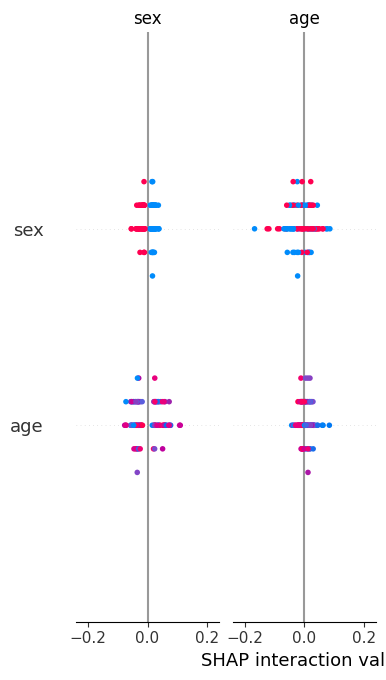

In [71]:
# SHAP values and summary plot
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

Final Evaluation on Test Set:

In [72]:
# Assuming RandomForest performed best
y_pred_final = rf.predict(X_test)
print(f'Final Model Accuracy: {accuracy_score(y_test, y_pred_final)}')
print(f'Final Model Precision: {precision_score(y_test, y_pred_final)}')
print(f'Final Model Recall: {recall_score(y_test, y_pred_final)}')
print(f'Final Model F1 Score: {f1_score(y_test, y_pred_final)}')
print(confusion_matrix(y_test, y_pred_final))

Final Model Accuracy: 0.7191011235955056
Final Model Precision: 0.6829268292682927
Final Model Recall: 0.7
Final Model F1 Score: 0.691358024691358
[[36 13]
 [12 28]]


Saving the Model for Deployment:

In [73]:
joblib.dump(rf, 'diabetes_rf_model.pkl')

['diabetes_rf_model.pkl']

In [79]:
# Importing necessary libraries
from sklearn.datasets import load_diabetes
import pandas as pd

# Loading the diabetes dataset from Scikit-Learn
diabetes = load_diabetes()

# Creating a DataFrame to hold the dataset
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Adding the target column to the DataFrame
data['target'] = diabetes.target